In [1]:
import requests

from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick

import seaborn as sns

In [2]:
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [3]:
url_base = 'https://fbref.com/en/comps/65/'
url_end = '-A-League-Men-Stats'

In [4]:
BACKGROUND_COLOUR = '#323232'
GREY_COLOUR = '#CCCCCC'

In [5]:
COLOUR_BACKGROUND = '#F7F3ED'
COLOUR_ALMOST_BLACK = '#252423'

COLOUR_BLUE = '#228be6'
COLOUR_PINK = '#e64980'

colour_palette = {
    'Sydney FC 2022/23' : COLOUR_PINK,
    'All other seasons' : COLOUR_BLUE
    }

In [6]:
first_season = 2005
last_season = 2022

In [7]:
seasons = []

for season in range(first_season, last_season + 1):
    season_string = str(season) + '-' + str(season + 1)
    seasons.append(season_string)

In [8]:
def get_soup(season):
    url_full = url_base + season + '/' + season + url_end
    response = requests.get(url_full)

    soup = BeautifulSoup(response.content, 'html.parser')

    table = soup.find('table', {'id': 'stats_squads_standard_for'})

    return table

In [9]:
def scrape_data_from_soup(tbody):
    
    data = []
    for row in tbody.find_all('tr'):
        cols = row.find_all('td')
        player = row.find('th', {'data-stat': 'team'})
        cols = [player.text.strip()] + [col.text.strip() for col in cols]
        data.append(cols)

    return data

In [10]:
def scrape_column_headers_from_soup(table):
    
    table_header = table.find('thead')
    header_rows = table_header.find_all('tr')
    for row in header_rows:
        column_headers = row.find_all('th')
        column_headers = [col.text.strip() for col in column_headers]

    return column_headers

In [11]:
def get_squad_standard_stats(season):

    table = get_soup(season)
    tbody = table.find('tbody')

    data = scrape_data_from_soup(tbody)

    column_headers = scrape_column_headers_from_soup(table)

    df = pd.DataFrame(data, columns=column_headers)
    df['Season'] = season
    df['Squad Season'] = df['Squad'] + ' - ' + df['Season']

    return df

In [12]:
for i, season in enumerate(seasons):
    if i == 0:
        df_stats = get_squad_standard_stats(season)
    else:
        df_stats = pd.concat([df_stats, get_squad_standard_stats(season)], axis=0)

In [13]:
for column in ['PK', 'PKatt']:
    df_stats[column] = df_stats[column].astype(int)

In [14]:
df_penalties = df_stats[['Squad Season', 'Squad', 'Season', 'PK', 'PKatt']].copy(deep=True)

In [15]:
df_penalties['Penalty Conversion Rate'] = df_penalties['PK'] / df_penalties['PKatt']

In [16]:
df_penalties_grouped = df_penalties.groupby(['PK', 'PKatt']).agg(['mean', 'count']).reset_index()
df_penalties_grouped.columns = ['PK', 'PKatt', 'Penalty Conversion Rate', 'Number of Clubs / Seasons']

  df_penalties_grouped = df_penalties.groupby(['PK', 'PKatt']).agg(['mean', 'count']).reset_index()


In [17]:
total_penalties_scored = df_penalties.agg({'PK' : 'sum', 'PKatt' : 'sum'})['PK']
total_penalties_attempted = df_penalties.agg({'PK' : 'sum', 'PKatt' : 'sum'})['PKatt']

average_success_rate = total_penalties_scored / total_penalties_attempted
f'{average_success_rate:.1%}'

'79.5%'

In [18]:
total_penalties_attempted

767

In [19]:
df_penalties_grouped['Season group'] = np.where((df_penalties_grouped['PK']==1) & (df_penalties_grouped['PKatt']==7), 'Sydney FC 2022/23', 'All other seasons')
df_penalties_grouped

,PK,PKatt,Penalty Conversion Rate,Number of Clubs / Seasons,Season group
0,0,0,NaN,0,All other seasons
1,0,1,0.000000,3,All other seasons
2,0,2,0.000000,1,All other seasons
3,1,1,1.000000,10,All other seasons
4,1,2,0.500000,3,All other seasons
5,1,3,0.333333,6,All other seasons
6,1,7,0.142857,1,Sydney FC 2022/23
7,2,2,1.000000,16,All other seasons
8,2,3,0.666667,14,All other seasons
9,2,4,0.500000,6,All other seasons


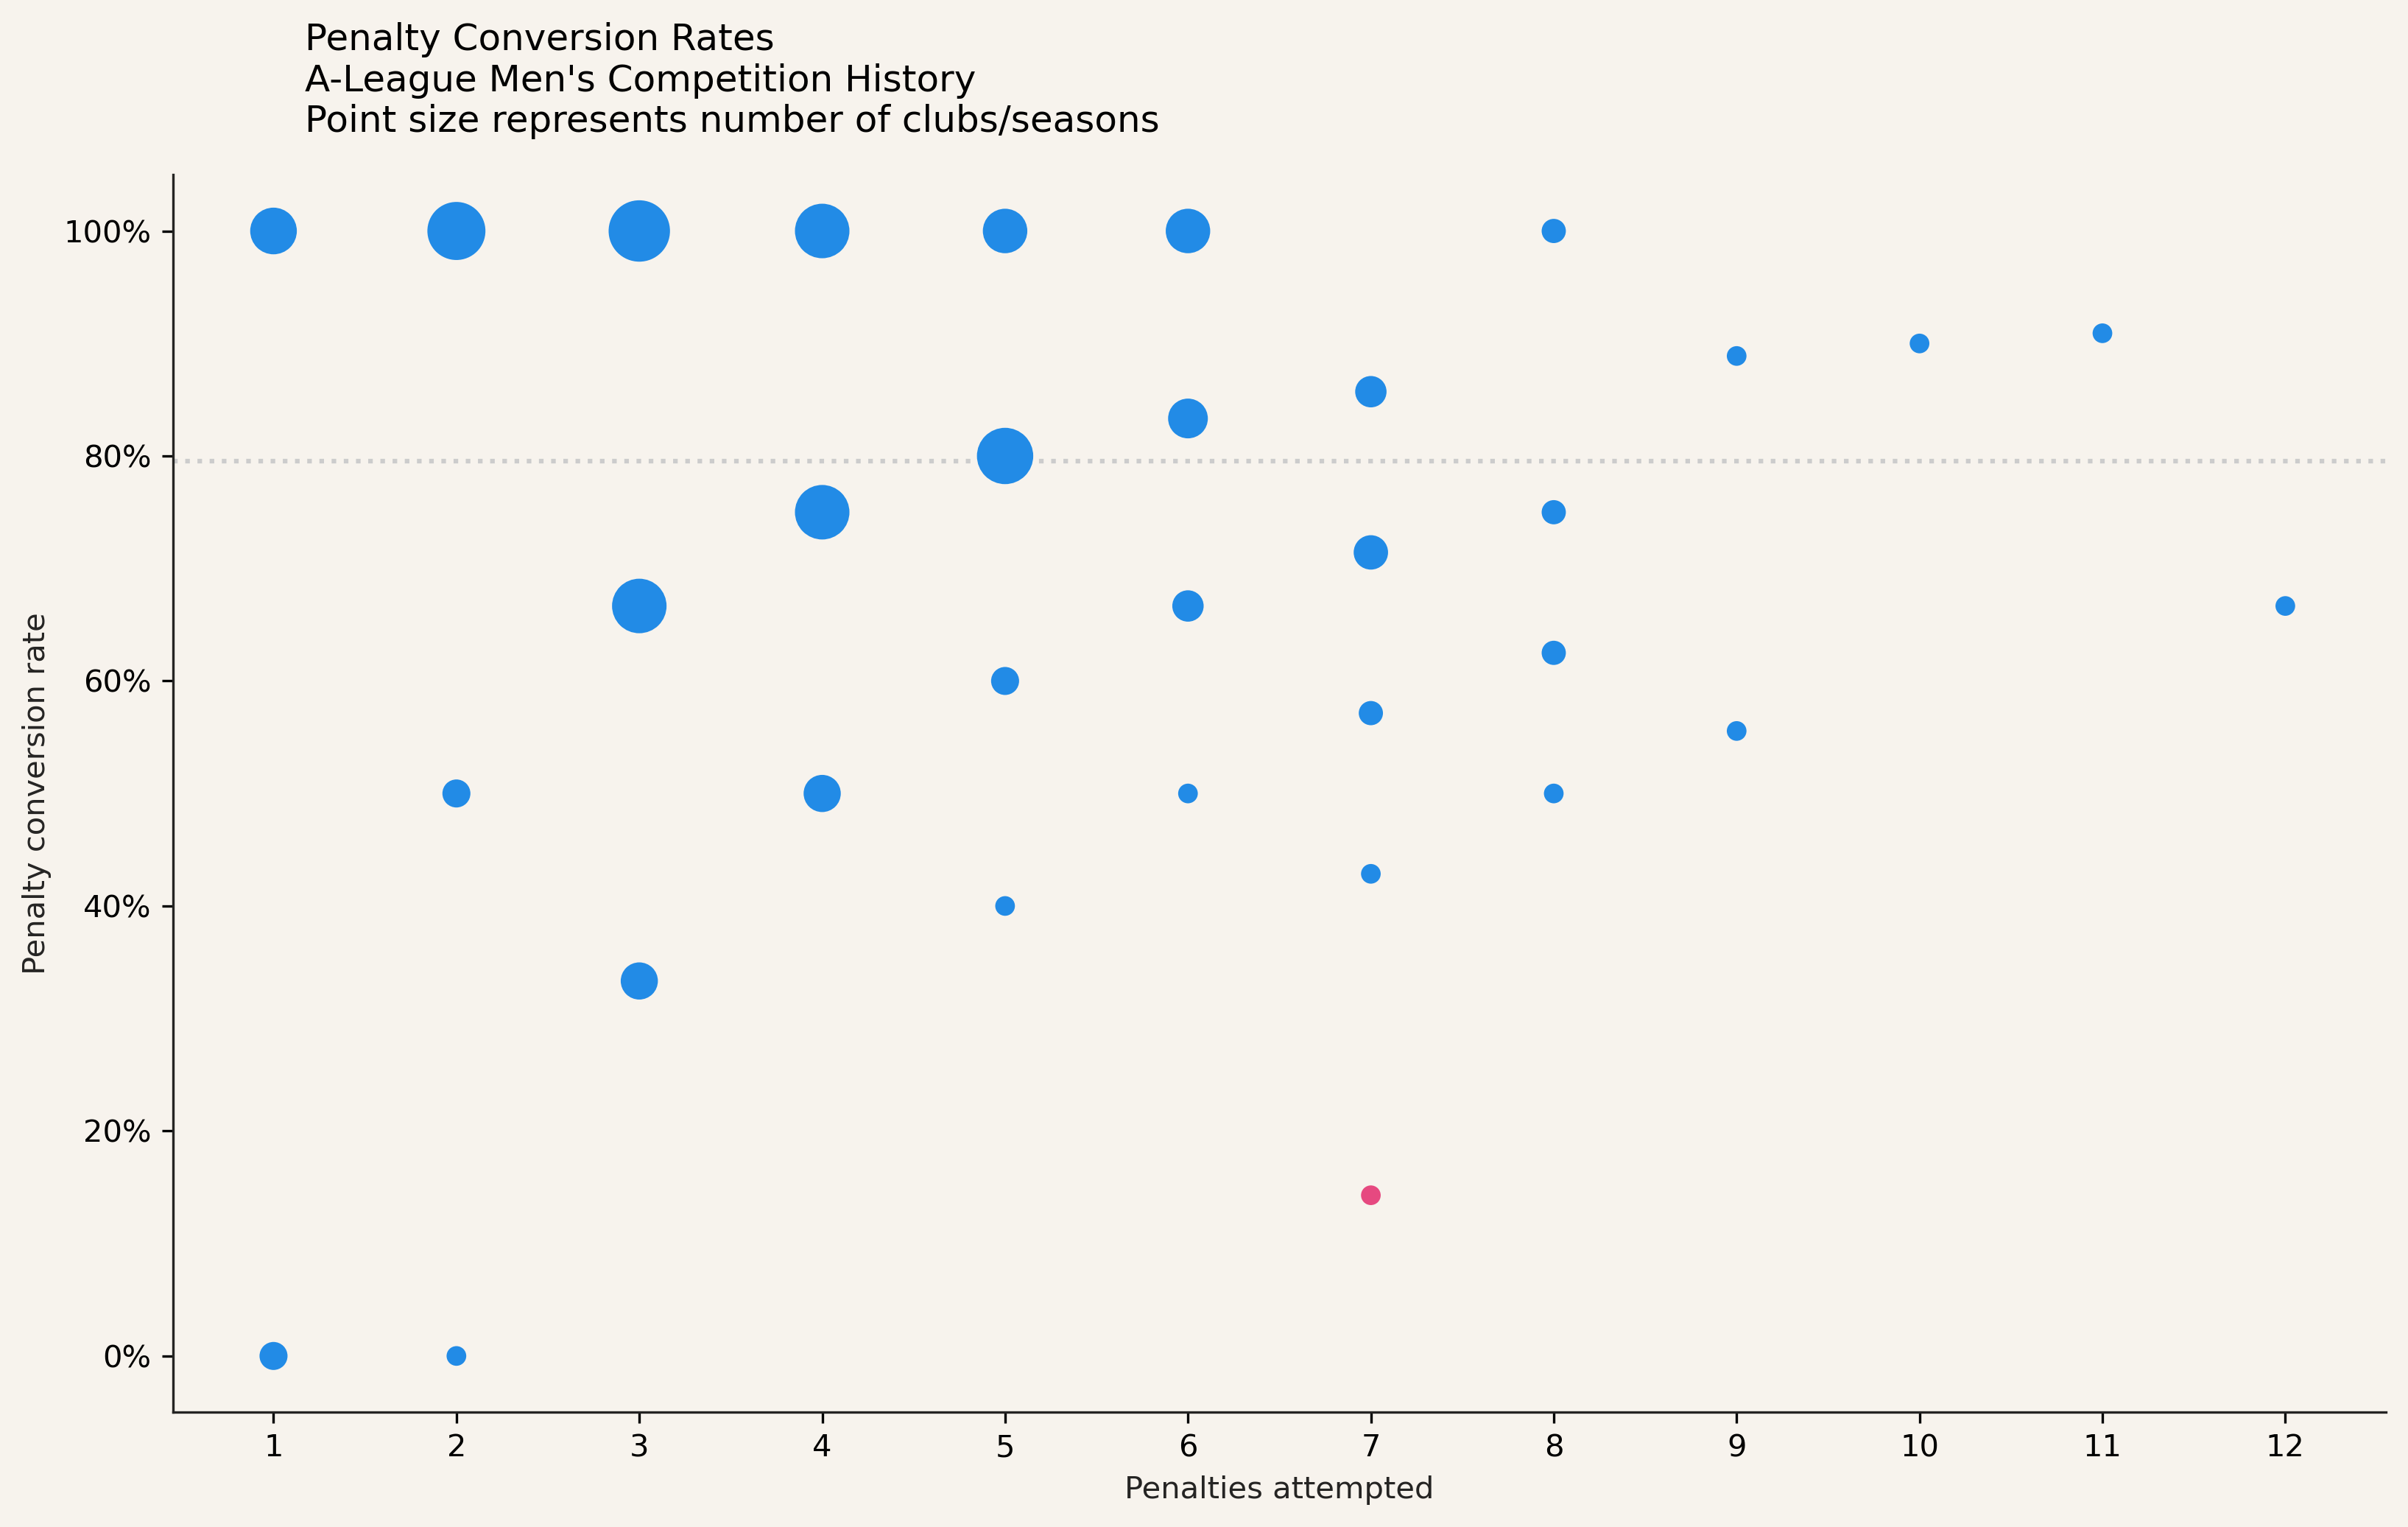

In [20]:
fig, ax = plt.subplots(figsize=(11,7))

fig.patch.set_facecolor(COLOUR_BACKGROUND)
ax.patch.set_facecolor(COLOUR_BACKGROUND)

ax.spines['bottom'].set_color(COLOUR_ALMOST_BLACK)  
ax.spines['left'].set_color(COLOUR_ALMOST_BLACK)  
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.label.set_color(COLOUR_ALMOST_BLACK)
ax.yaxis.label.set_color(COLOUR_ALMOST_BLACK)

sns.scatterplot(data=df_penalties_grouped, x='PKatt', y='Penalty Conversion Rate', size='Number of Clubs / Seasons', legend='full', sizes=(20, 400), zorder=2, hue='Season group', palette=colour_palette, ec=None)

ax.legend().remove()

ax.axhline(y=average_success_rate, ls='dotted', alpha=1, zorder=1, color='#CCCCCC')

yticks = mtick.PercentFormatter(xmax=1.0, decimals=None, symbol='%')
ax.yaxis.set_major_formatter(yticks)

ax.set_xlabel('Penalties attempted')
ax.set_ylabel('Penalty conversion rate')

ax.xaxis.set_major_locator(mtick.MultipleLocator(base=1))

fig.suptitle("Penalty Conversion Rates\nA-League Men's Competition History\nPoint size represents number of clubs/seasons", ha='left', x=0.13)

fig.tight_layout()

fig.savefig('img/penalty_conversion_rates.pdf', bbox_inches='tight')
